In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

Function to create a matrix in which it will span for each value of x to each value of y .

In [2]:
def clubed_matrix(x,y):
  m = [];
  for i in x:
    k = [] ;
    for j in y:
      k.append([i,j]);
    m.append(k);
  return m    

For each individual value in a matrix of (x,y) at each (i,j) finding its value to a given function f(x,y) , i.e finding z of our (x,y,z) in a matrix form

In [3]:
def z(x,y,function):
  z = [] ;
  m = clubed_matrix(x,y);m = np.array(m);
  rows = m.shape[0];cols = m.shape[1];
  for i in range(rows):
    k = [] ;
    for j in range(cols):
      point = m[i][j]
      f = function(point[0],point[1]);
      k.append(f);
    z.append(k);

  return z ;    

Creating a function to separate individual values of x and y from a clubbed matrix of (x,y) . It will be used later once we apply the map

In [4]:
def seperate_clubed_matrix(matrix):
  l = len(matrix);
  x,y = [],[];
  for i in range(matrix.shape[0]):
    x_c = [] ; y_c = []
    for j in range(matrix.shape[1]):
      x_p , y_p = matrix[i][j];
      x_c.append(x_p); y_c.append(y_p);

    x.append(x_c);y.append(y_c);
  
  x = np.array(x);y=np.array(y);
  return x , y       

Creating a function to find partial derivatives , the idea is using the central difference method to find partial derivatives of a given function f(x,y).

In [5]:
def f_x(point,h,function):
  x , y = point[0] , point[1]
  fx = (function(x+h,y) - function(x-h,y))/(2*h) ;
  return fx

In [6]:
def f_y(point,k,function):
  x , y = point[0] , point[1]
  fy = (function(x,y+k) - function(x,y-k))/(2*k) ;
  return fy

Creating a function to find the gradient of a function given the point and unit step in x direction as h and unit step in y direction as k.

In [7]:
def find_gradient(point,h,k,function):
  fx = f_x(point,h,function);
  fy = f_y(point,k,function);
  gradient = [fx , fy];
  return gradient

Creating a function to find the gradient of a function given the point and unit step in x direction as h and unit step in y direction as k.

In [8]:
def decent_one_step(point,h,k,function,step):
  #point = (x(k),y(k)) "of form" ; 
  grad_at_point = np.array(find_gradient(point,h,k,function));
  next_point = np.array(point) - np.multiply(step,grad_at_point)
  return next_point

Creating a function that will perform gradient descent on our original surface X , given this things : x values(xarr) , y values (yarr) , function of form f(x,y) , step size for gradient descent α , seed which is used to remember what random starting point is used , and everytime we rerun it we don't want our start point to change . This function will use the small functions defined above . The values of h and k are determined by h = (b-a)/length(xarr)  & k = (d-c)/length(yarr) , where a= x[0] , b=x[last] , c =y[0] , d = y[last] 
First will decent 1 step outside the loop using the point P0=(a,b,c), then we will iterate through the loop until the value of f(xi+1,yi+1) < f(xi,yi) .
Along the same time count the number of steps .
It will return the points taken by the algorithm & total step.


In [9]:
def gradient_decent_given_function(xarr,yarr,function,step=0.001,seed=1):
  random.seed(seed);

  h = (xarr[-1] - xarr[0])/len(xarr);
  k = (yarr[-1] - yarr[0])/len(yarr);
  #choose a random  
  x0= np.random.choice(xarr);y0 = np.random.choice(yarr) ;

  # we need individual list of x and y to use them in plotting 
  x_points = []  ;y_points = []  ;x_points.append(x0);  y_points.append(y0);
  points = [];points.append([x0,y0]);
  #list points is for clubbed (x,y) it has form [[x0,y0],[x1,y1],...]   
  function_at_points = [] ;
  function_at_points.append(function(x0,y0)) ;

  x1 , y1 = decent_one_step(points[0],h,k,function,step=step) ;
  x_points.append(x1);  y_points.append(y1)  ;
  points.append([x1,y1]);
  function_at_points.append(function(x1,y1));
  
  i = 0 ; 
  while function_at_points[i+1] < function_at_points[i]:
    x_next , y_next = decent_one_step(points[i+1],h,k,function,step=step);
    fxy = function(x_next,y_next);
    if x_next >= xarr[0] and x_next <= xarr[-1] and y_next >= yarr[0] and y_next <= yarr[-1] :
      function_at_points.append(fxy);
      points.append([x_next,y_next]);x_points.append(x_next);  y_points.append(y_next);
      i += 1 ;
    else :
      break 
  total_steps = i ;
  print('Total steps are {}'.format(i))  ;
  return x_points , y_points , points , function_at_points , total_steps 

Creating a function that will perform gradient descent on the new surface Y , using the map (x,y,z) =(x,y,4z) which is supplied as homeo_map. It will also need the point P0=(a,b,c) as we need the same starting points . Here instead of xarr and yarr I’m using the matrix of x and y which was separated from the clubbed matrix of surface X , it will be just used to find the step size (h,k) for this surface Y. Also as discussed above we will need a function to represent the z in surface Y , i.e z =g(x,y) = 4(x2+y2) , which will be the function in the gradient descent algorithm it is supplied as trans_fun_z.
First we would transform the point P0 to R0 using  , now decent one step in the direction of negative gradient of g(x,y) . So once we have to points we can again make a loop which will run until g(xi+1,yi+1) < g(xi,yi)
It will return the points taken by the algorithm & total step.


In [37]:
def gradient_decent_after_map(original_start_point,homeo_map,x_mat,y_mat,z_mat,trans_fun_z,step=0.001,seed=1):
  random.seed(seed);

  x_points,y_points,function_points,points = [] , [] , [] , [] ;
  
  ox , oy , oz = original_start_point
  x0 , y0 , z0 = homeo_map(ox,oy,oz);
  x_points.append(x0);y_points.append(y0);function_points.append(z0);
  points.append([x0,y0]);


  h = (np.max(x_mat) - np.min(x_mat))/len(x_mat);
  k = (np.max(y_mat) - np.min(y_mat))/len(y_mat); 

  x1 , y1 = decent_one_step((x0,y0),h,k,trans_fun_z,step=step);
  z1  = trans_fun_z(x1,y1);print()
  x_points.append(x1);y_points.append(y1);function_points.append(z1);
  points.append([x1,y1]);

  i = 0 ;
  while function_points[i+1] < function_points[i]:
    x_prev , y_prev = x_points[i+1] , y_points[i+1];
    x_next , y_next = decent_one_step((x_prev,y_prev),h,k,trans_fun_z,step=step);
    z_next = trans_fun_z(x_next,y_next);

    if x_next >= np.min(x_mat) and x_next <= np.max(x_mat) and y_next >= np.min(y_mat) and y_next <= np.max(y_mat) :
      x_points.append(x_next);y_points.append(y_next);
      function_points.append(z_next);
      points.append([x_next,y_next]);
      i += 1 ;
    else:
      break;  

  total_steps = i ;
  print('Total steps are {}'.format(i));

  return x_points ,y_points,points,function_points, total_steps ;  

Creating a function for f(x,y) = x2+y2 , (x,y,z) =(x,y,4z)  & g(x,y) = 4(x2+y2) , where g(x,y) represented as tr_psi1


In [11]:
def f(x,y):
  return x**2 + y**2;

In [12]:
def psi1(x,y,z):
  a = x ;
  b = y ;
  c = 6*z;
  return a ,b,c

In [13]:
def tr_psi1(X,Y):
  Z = 6*(X**2 + Y**2)
  return Z

 
Creating the array of x: -15<x<15 and y : -10<y<10 


In [14]:
x = np.linspace(-15,15,300);
y = np.linspace(-15,15,300);

Creating a clubbed matrix that span each value of x for each value of y , Also creating individual matrices of x and y which are formed from function seperate_clubed_matrix which we will use later . 

In [15]:
M = np.array(clubed_matrix(x,y))

In [16]:
X , Y = seperate_clubed_matrix(M);

Making a matrix of z values of Surface X using the f(x,y) , it will be of the matrix form as it takes values from the clubbed matrix while defining the function.

In [17]:
Z = np.array(z(x,y,f));

Visualizing the surface

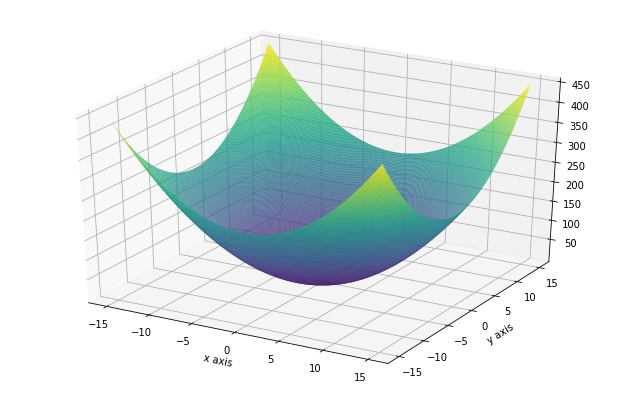

In [18]:
plt.rcParams['figure.figsize'] = [11, 7]
ax = plt.axes(projection='3d')
plt.xlabel('x axis');plt.ylabel('y axis');
ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap='viridis', edgecolor='none')

 
Now Performing the gradient descent on Surface X , having points (x,y,f(x,y)) . 


Please run it over if the the descent is less steps , as sometimes the random start point will be close to the minimum and have less steps for convergence

In [19]:
x_points , y_points , points , function_at_points , total_steps = gradient_decent_given_function([-15,15],[-10,10],f);

Total steps are 18555


Below code it to plot the surface and the points of gradient descent along the surface in a 3d plane with zoomed in size of the figure .

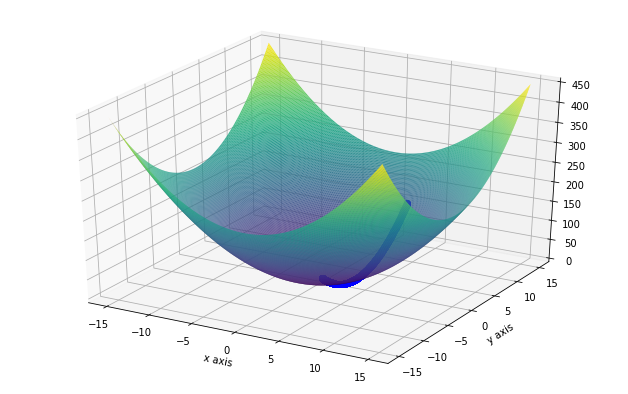

In [20]:
plt.rcParams['figure.figsize'] = [11, 7]
ax = plt.axes(projection='3d')
plt.xlabel('x axis');plt.ylabel('y axis');
ax.plot(x_points,y_points,function_at_points,'o',color='blue')
ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap='viridis', edgecolor='none')

Now applying the map (x,y,z) =(x,y,4z) on our surface X and plotting it.

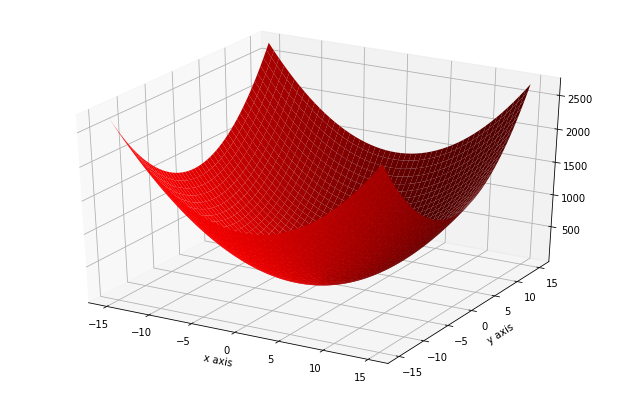

In [21]:
a , b , c = psi1(X,Y,Z);
ax = plt.axes(projection='3d');
plt.xlabel('x axis');plt.ylabel('y axis');
plt.rcParams['figure.figsize'] = [11, 7];
ax.plot_surface(a,b,c,color='red')

Now plotting both the surfaces X and Y to see the Homeomorphic transformation. X in blue and Y in Red .

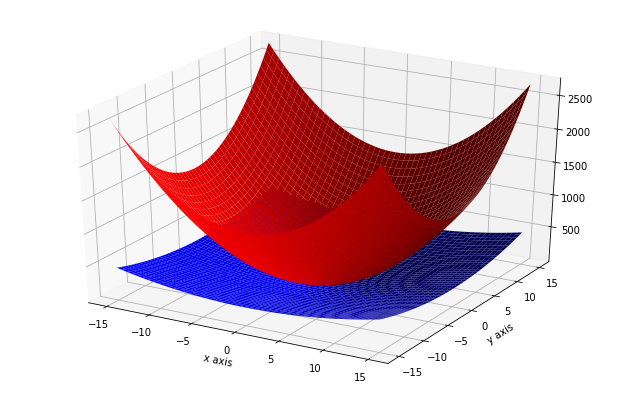

In [22]:
plt.rcParams['figure.figsize'] = [11, 7]
ax = plt.axes(projection='3d')
plt.xlabel('x axis');plt.ylabel('y axis');
ax.plot_surface(X,Y,Z,color='blue');
ax.plot_surface(a,b,c,color='red');
plt.show()

.

As we need point P0=(a,b,c)which a random point selected on the surface X which is referenced as start_point_in_old .

In [23]:
start_point_in_old = [x_points[0] , y_points[0] , function_at_points[0]]

Now , performing gradient descent on surface Y so we use the function defined above which was to be used after transformation . It will need input of the starting point in X which was P0, the homeomorphic mapping (x,y,z) =(x,y,4z) , the values of x , y and z after transformation which are a , b and c respectively in matrix form . The trans_func_z which is g(x,y) .

In [24]:
a_points , b_points , points2 , function_at_points2 , total_steps2 = gradient_decent_after_map(start_point_in_old,homeo_map=psi1,x_mat=a,y_mat=b,z_mat=c,trans_fun_z=tr_psi1,step=0.001,seed=1)


Total steps are 3484


Plotting the surface Y along with the points obtained from the algorithm to see its convergence


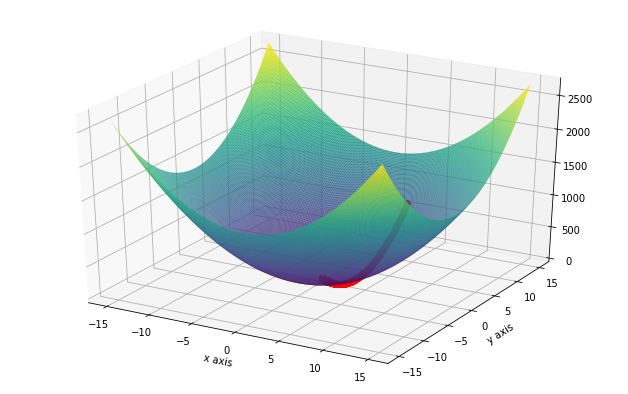

In [25]:
plt.rcParams['figure.figsize'] = [11, 7]
ax = plt.axes(projection='3d');plt.xlabel('x axis');plt.ylabel('y axis');
ax.plot(a_points , b_points,function_at_points2,'o',color='red')
ax.plot_surface(a,b,c,rstride=1, cstride=1,cmap='viridis', edgecolor='none');

Now plotting both the surfaces X and Y together along with their points obtained from gradient descent. The points of convergence on X are represented as Blue while that of Y are in Red

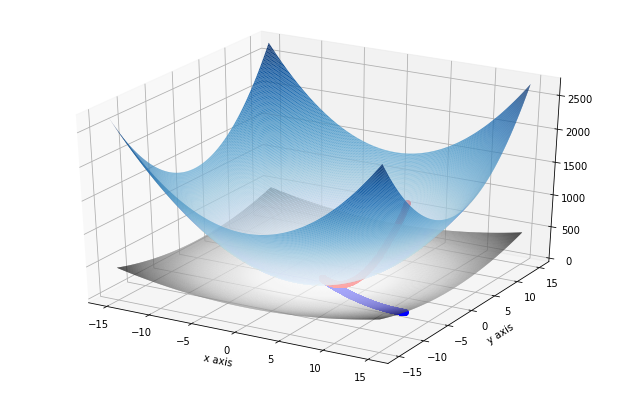

In [26]:
plt.rcParams['figure.figsize'] = [11, 7]
ax = plt.axes(projection='3d');plt.xlabel('x axis');plt.ylabel('y axis');
ax.plot(x_points,y_points,function_at_points,'o',color='blue')
ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap='Greys', edgecolor='none');
ax.plot(a_points , b_points,function_at_points2,'o',color='red')
ax.plot_surface(a,b,c,rstride=1, cstride=1,cmap='Blues', edgecolor='none');

Now plotting both the surfaces X and Y together along with their points obtained from gradient descent. The points of convergence on X are represented as Blue while that of Y are in Red

In [27]:
print("Total steps before homeomorphic map are {} , while steps after map are {}".format(total_steps,total_steps2))

Total steps before homeomorphic map are 18555 , while steps after map are 3484


Creating a function the represents the inverse map   -1(x,y,z) =(x , y ,z/4) 


In [28]:
def psi1_inv(x,y,z):
  a = x ; 
  b = y ; 
  c = z/4 ;
  return a , b , c ;

Creating a function that will map a point from surface Y to surface X using   -1

In [29]:
def inverse_point(final_point,inverse_map):
  x,y,z = final_point[0] , final_point[1],final_point[2]
  a,b,c = inverse_map(x,y,z);
  return a,b,c

Now taking the final point after descending on surface 

In [30]:
final_point_before_map = (x_points[-1],y_points[-1],function_at_points[-1])

In [31]:
print(final_point_before_map)

(8.851390252154413e-16, -8.868758228896025e-16, 1.5700198191854512e-30)


 
Now taking the final point after descending on surface Y.


In [32]:
final_point_after_map = (a_points[-1],b_points[-1],function_at_points2[-1])

In [33]:
print(final_point_after_map)

(6.827786258414898e-18, -6.865609045847725e-18, 5.6253151656615245e-34)


Taking the inverse map of final point on Y , which will result to point on X and compare how close they are to the minimum of f(x,y) = x2 + y2

In [34]:
inverse_point_final_after_map = inverse_point(final_point_after_map,psi1_inv)

In [35]:
print(inverse_point_final_after_map)

(6.827786258414898e-18, -6.865609045847725e-18, 1.4063287914153811e-34)


Clearly the last point obtained from convergence on Y after the inverse map is more closer to (0,0,0) than the point obtained from convergence on X .
And also the steps of convergence on surface X is 18555 , while that on surface Y are 5248 . 


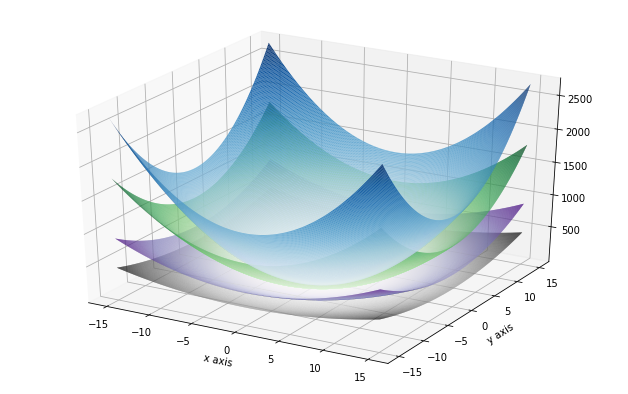

In [36]:
def psi3(x,y,z):
  a = x ;
  b = y ;
  c = 2*z;
  return a ,b,c

def psi4(x,y,z):
  a = x ;
  b = y ;
  c = 4*z;
  return a ,b,c

def psi5(x,y,z):
  a = x ;
  b = y ;
  c = 6*z;
  return a ,b,c





plt.rcParams['figure.figsize'] = [11, 7]
ax = plt.axes(projection='3d');plt.xlabel('x axis');plt.ylabel('y axis');

ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap='Greys', edgecolor='none');

a1,b1,c1 = psi3(X,Y,Z);
ax.plot_surface(a1,b1,c1,rstride=1, cstride=1,cmap='Purples', edgecolor='none');

a1,b1,c1 = psi4(X,Y,Z);
ax.plot_surface(a1,b1,c1,rstride=1, cstride=1,cmap='Greens', edgecolor='none');

a1,b1,c1 = psi5(X,Y,Z);
ax.plot_surface(a1,b1,c1,rstride=1, cstride=1,cmap='Blues', edgecolor='none');


